#import data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from sklearn import metrics
import time

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [7]:
train.isna().sum().sum()

0

In [8]:
test.isna().sum().sum()


0

# Data Exploration

In [9]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [10]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [11]:
# plt.figure(figsize=(8, 5))
# sns.countplot(train['label'], palette='Dark2')
# plt.title('Train labels count')


In [12]:
train['label'].value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [13]:
la=train.groupby(train['label'])
la

<ipython-input-14-a521cfdbdeee>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


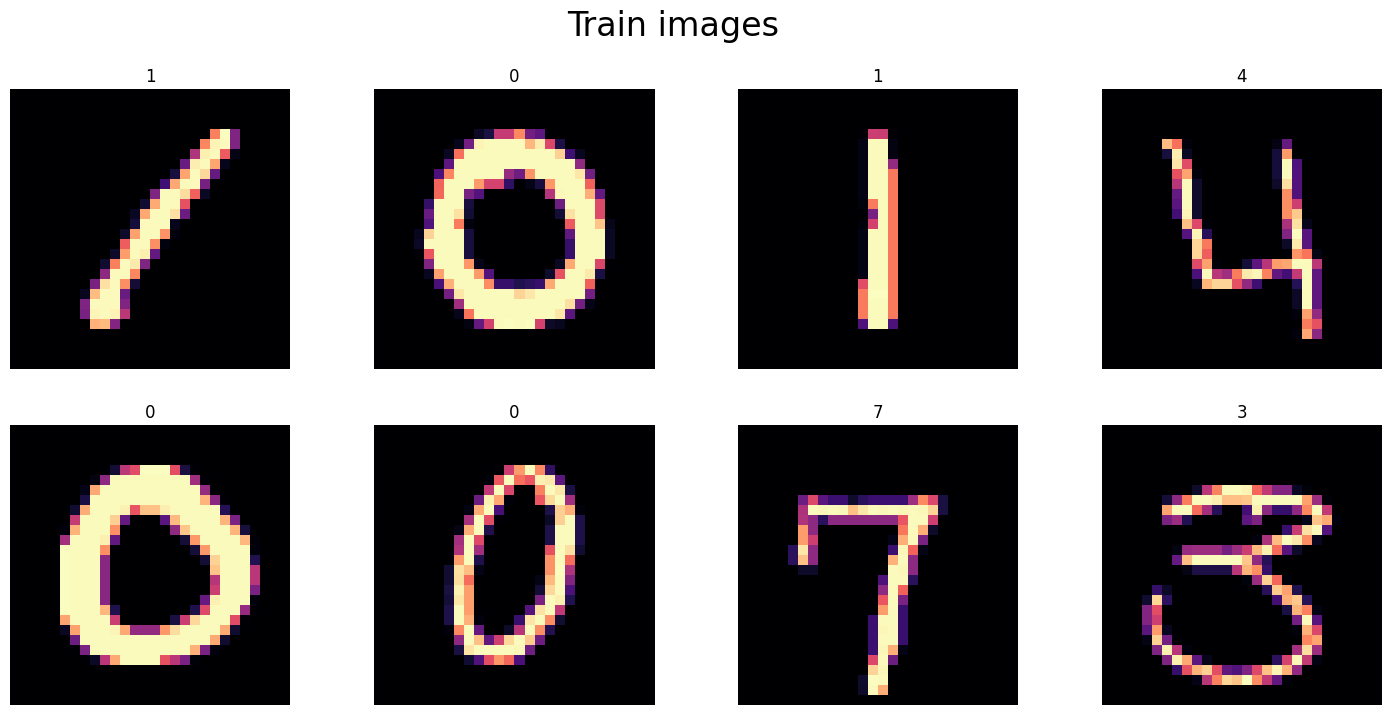

In [14]:
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in train.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(row[0])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Train images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

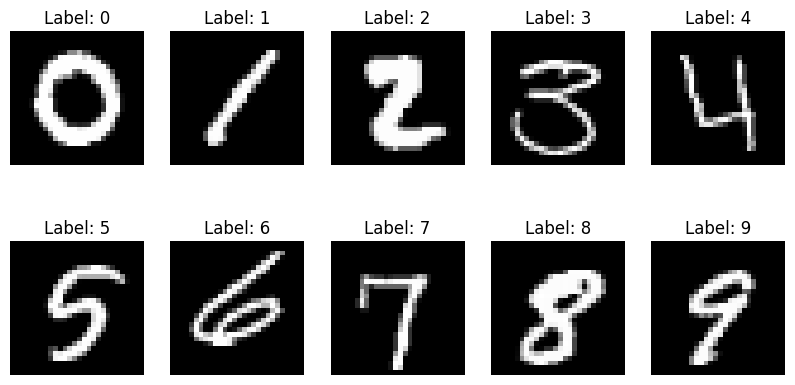

In [15]:
examples_per_label = (
    train.groupby('label').apply(lambda group: group.iloc[0, 1:].values.reshape(28, 28))
)

fig, axs = plt.subplots(2, 5, figsize=(10, 5))

for (label, example), ax in zip(examples_per_label.items(), axs.flatten()):
    ax.imshow(example, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.show()

# dimensionality reduction

In [16]:
labels = train['label']
pixels = train.drop('label', axis=1)
pixels=pixels/255
test=test/255
pixels.describe()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000860,0.000459,0.000231,0.000079,0.000068,0.000011,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024756,0.018172,0.012841,0.006901,0.007429,0.001625,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


In [17]:
fpixels = pixels.values.reshape( -1,28*28)
ftest = test.values.reshape( -1,28*28)


In [18]:
fpixels=pd.DataFrame(fpixels)
ftest = pd.DataFrame(ftest)


In [19]:
fpixels.shape

(42000, 784)

In [20]:
from sklearn.decomposition import PCA

In [21]:
d = fpixels[:8]
d.shape

(8, 784)

In [22]:
# fig, ax = plt.subplots(figsize=(18, 8))
# for ind, img in enumerate(d):
#     plt.subplot(2, 4, ind+1)
#     plt.title(row[0])
#     fig.suptitle('Train images', fontsize=24)
#     plt.axis('off')
#     plt.imshow(img, cmap='magma')

In [23]:

n_components = 50

pca = PCA(n_components=n_components)

pca_result = pca.fit_transform(fpixels)

pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])

pca_df = pd.concat([labels, pca_df], axis=1)

pca_df.head()


,label,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,1,-2.594493,-2.742397,0.718753,0.472986,-0.317968,1.919458,-2.680278,0.335527,1.366855,...,0.414397,0.074111,0.161162,-0.144085,-0.815531,0.110156,-0.198890,-0.230564,-0.304855,0.295724
1,0,6.672360,-1.413928,-1.967865,1.315387,-1.734819,2.895702,2.564217,-0.692552,-0.029491,...,0.049145,0.012978,0.042662,-0.186384,-0.427986,-0.187263,-0.127442,-0.594672,0.453574,-0.036799
2,1,-3.478017,-1.152023,0.263354,0.306917,-1.857709,-1.268787,1.716859,-1.197560,-0.765865,...,0.630531,0.119315,0.305803,0.442886,0.127903,0.532284,0.010230,-0.043721,-0.235723,-0.155585
3,4,-0.650022,1.177187,-0.251551,2.979240,-1.669978,0.617217,-1.192546,1.083957,-0.179871,...,-0.233747,0.562233,0.211353,0.602107,0.832563,1.120403,0.680569,0.388669,-0.168623,0.101126
4,0,7.543960,-1.761385,-2.151424,0.739432,-2.555829,3.882603,2.213753,-1.003589,0.489862,...,0.478999,-0.322028,0.205046,-0.184283,-0.425576,0.182354,0.079107,-0.118249,0.001474,0.470006


In [24]:

pca_test = pca.fit_transform(ftest)

pca_test_df = pd.DataFrame(data=pca_test, columns=[f'PC{i}' for i in range(1, n_components + 1)])


pca_test_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,3.305606,0.567347,2.914199,2.637555,1.514525,1.919663,0.806149,0.332881,-1.234364,-1.321807,...,-0.144341,-0.312280,-1.048755,0.488983,0.415398,-0.307887,-0.962326,0.074082,-0.442902,0.148730
1,4.481195,0.285946,0.990474,-0.248639,-3.668353,1.751423,2.882699,-0.955251,1.693928,-1.918208,...,0.069860,-0.431817,0.331802,-0.114201,0.226146,-0.806140,-0.636176,-0.674627,0.424292,-0.017479
2,-1.953681,-0.527386,0.681696,-0.304230,-0.663703,0.531303,-1.291072,-1.344442,-1.110303,1.627040,...,0.579793,-0.815070,0.106386,0.426580,0.167582,0.124372,0.485545,-0.195433,-0.200538,0.388819
3,-0.917955,-2.397433,1.865791,1.670970,-0.790602,0.624107,-0.306629,0.474711,-0.409235,0.759295,...,0.128822,0.256155,0.409551,0.320853,-0.360880,-0.188981,-0.551389,-0.351390,-0.237124,0.612540
4,-0.481039,2.779916,0.008171,0.600696,1.144494,0.181592,0.270334,2.901425,-1.203504,0.108253,...,-0.350633,0.622092,-0.092201,0.421012,-0.126616,0.868999,-0.258341,0.401303,-0.092104,-0.801148


In [25]:
pca_df.shape


(42000, 51)

#models before pca



In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Data split

In [27]:
from sklearn.model_selection import train_test_split
X = train.drop('label', axis=1)
y = train['label']

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.35, random_state=40)

## cross validation

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=100)

## KNN

In [29]:
start= time.time()

clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring, error_score='raise')
end= time.time()
delay=end-start
score,delay

(array([0.96357143, 0.95833333, 0.96214286, 0.96428571, 0.96428571,
        0.96142857, 0.96761905, 0.95880952, 0.95857143, 0.96333333]),
 131.07987093925476)

In [30]:
delay

131.07987093925476

In [31]:
round(np.mean(score)*100,2)

96.22

## Decision tree

In [32]:
start= time.time()

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
end= time.time()
delay=end-start

score

array([0.855     , 0.8547619 , 0.85904762, 0.85738095, 0.85095238,
       0.85690476, 0.87261905, 0.85785714, 0.85738095, 0.85952381])

In [33]:
delay

130.32453036308289

In [34]:
round(np.mean(score)*100, 2)

85.81

## random forest

In [35]:
start= time.time()

clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
end= time.time()
delay=end-start

score

array([0.94452381, 0.93809524, 0.94880952, 0.94404762, 0.94785714,
       0.94452381, 0.95333333, 0.945     , 0.94285714, 0.94857143])

In [36]:
delay

41.872586727142334

In [37]:
round(np.mean(score)*100, 2)

94.58

## Naive Bayes

In [38]:
start= time.time()

clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
end= time.time()
delay=end-start

score

array([0.55309524, 0.555     , 0.56619048, 0.55785714, 0.54809524,
       0.55809524, 0.55166667, 0.53666667, 0.56071429, 0.56714286])

In [39]:
delay

10.647730350494385

In [40]:
round(np.mean(score)*100, 2)

55.55

## SVM

In [41]:
start= time.time()

clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
end= time.time()
delay=end-start

score

array([0.97666667, 0.97428571, 0.97880952, 0.97571429, 0.97619048,
       0.97452381, 0.98      , 0.97428571, 0.97595238, 0.97761905])

In [42]:
delay

1826.6039340496063

In [43]:
round(np.mean(score)*100,2)

97.64

## testing

In [44]:
clf = KNeighborsClassifier(n_neighbors = 13)
clf.fit(X, y)

prediction = clf.predict(test)

<ipython-input-45-8876af0df6d0>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


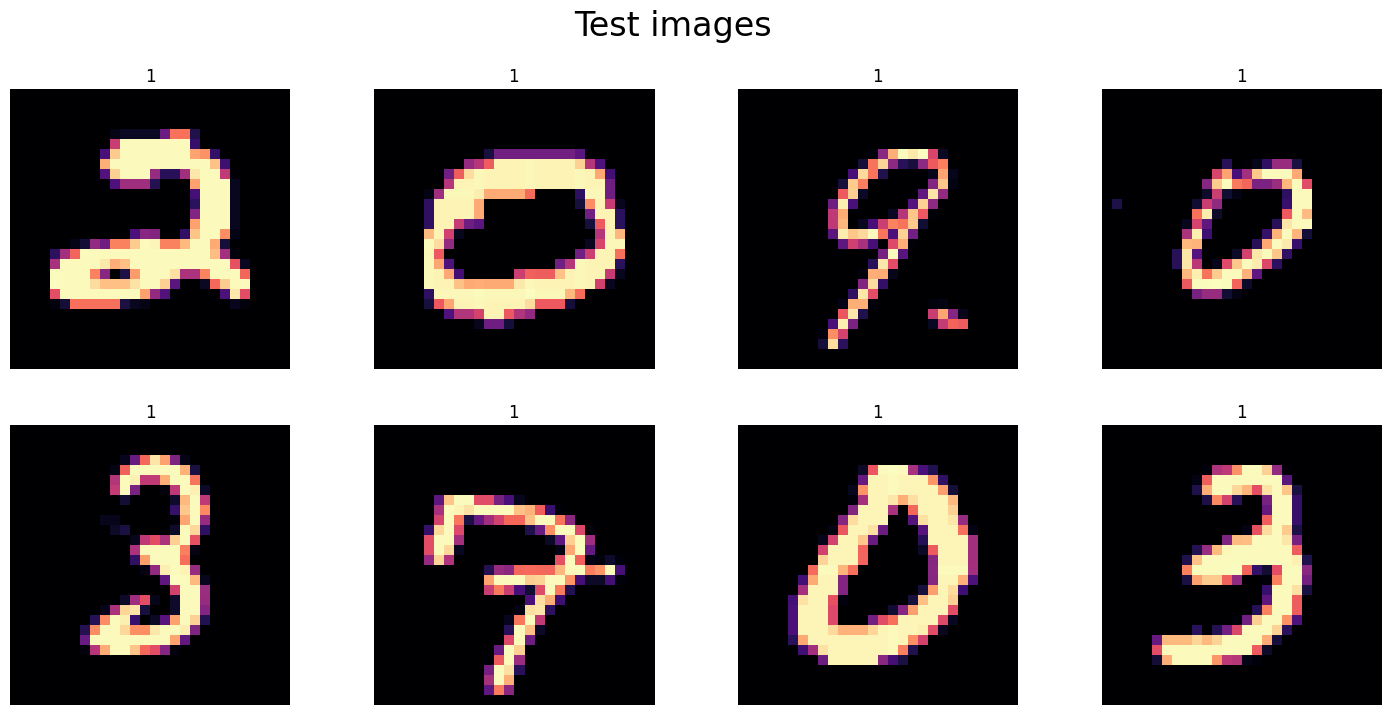

In [45]:
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in test.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(prediction[ind])
    img = row.to_numpy()[:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

#model after pca

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Data split

In [47]:
from sklearn.model_selection import train_test_split
X = pca_df.drop('label', axis=1)
y = pca_df['label']

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.35, random_state=40)

In [48]:
X_train.shape,y_train.shape

((27300, 50), (27300,))

## cross validation

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=100)

## KNN

In [50]:
start= time.time()

clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring, error_score='raise')
end= time.time()
delay=end-start

score

array([0.97119048, 0.96666667, 0.96880952, 0.96952381, 0.96952381,
       0.96785714, 0.97309524, 0.96714286, 0.96785714, 0.9697619 ])

In [51]:
delay

15.567810297012329

In [52]:
round(np.mean(score)*100,2)

96.91

## Decision tree

In [53]:
start= time.time()

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
end= time.time()
delay=end-start

score

array([0.83071429, 0.8252381 , 0.82738095, 0.83380952, 0.83095238,
       0.82571429, 0.82619048, 0.83761905, 0.81761905, 0.83928571])

In [54]:
delay

66.96940016746521

In [55]:
round(np.mean(score)*100, 2)

82.95

## random forest

In [56]:
start= time.time()

clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
end= time.time()
delay=end-start

score

array([0.91809524, 0.92309524, 0.92047619, 0.92095238, 0.92619048,
       0.92333333, 0.92809524, 0.9152381 , 0.91833333, 0.92880952])

In [57]:
delay

57.93416929244995

In [58]:
round(np.mean(score)*100, 2)

92.23

## Naive Bayes

In [59]:
start= time.time()

clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
end= time.time()
delay=end-start

score

array([0.8697619 , 0.86880952, 0.86952381, 0.87380952, 0.87357143,
       0.87214286, 0.87190476, 0.87214286, 0.86619048, 0.87238095])

In [60]:
delay

0.5718986988067627

In [61]:
round(np.mean(score)*100, 2)

87.1

## SVM

In [62]:
start= time.time()

clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
end= time.time()
delay=end-start

score

array([0.9802381 , 0.97785714, 0.98261905, 0.98047619, 0.98      ,
       0.97904762, 0.98452381, 0.9797619 , 0.98142857, 0.98071429])

In [63]:
delay

199.9214551448822

In [64]:
round(np.mean(score)*100,2)

98.07

## testing

In [65]:
clf = KNeighborsClassifier(n_neighbors = 13)
clf.fit(X, y)

prediction = clf.predict(pca_test_df)

In [66]:
 test.iloc[:8, :].shape

(8, 784)

<ipython-input-67-8876af0df6d0>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


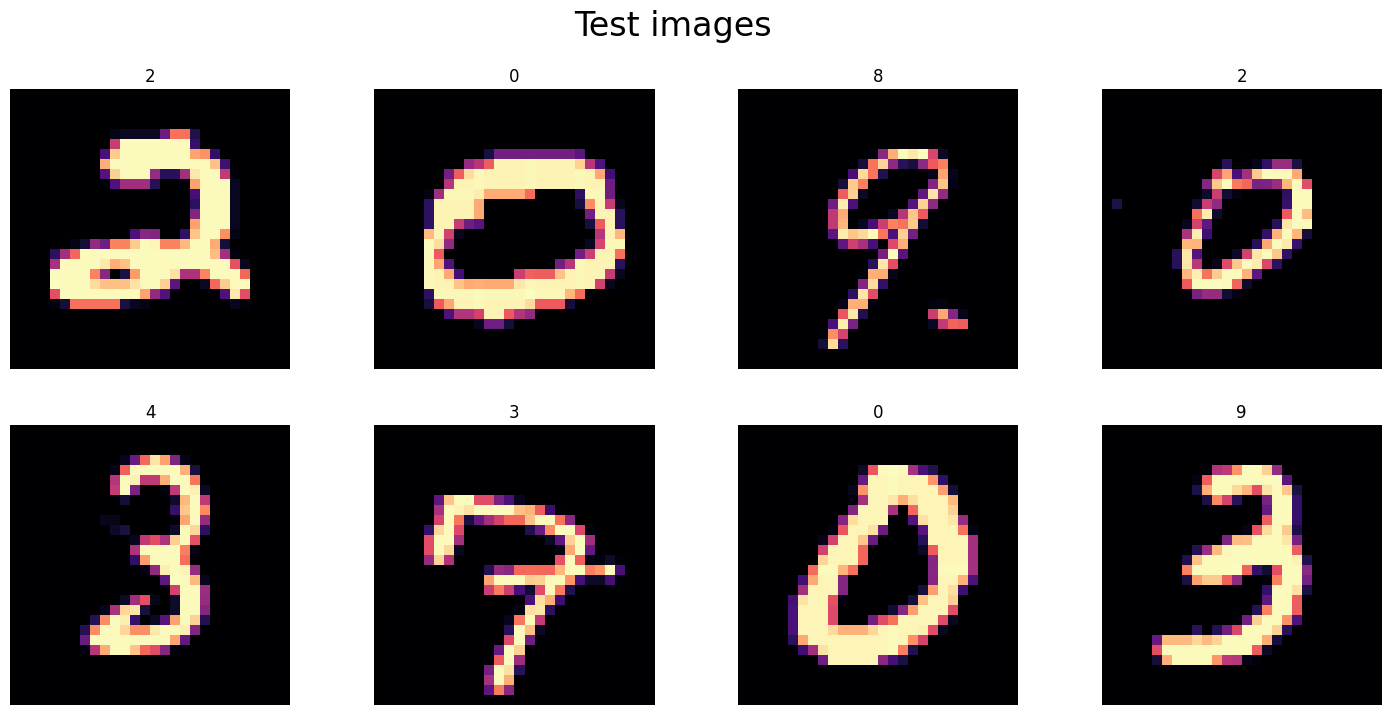

In [67]:
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in test.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(prediction[ind])
    img = row.to_numpy()[:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

#nothing

In [68]:
# import matplotlib.pyplot as plt
# from tensorflow.keras.datasets import mnist

# (train_images, train_labels), (_, _) = mnist.load_data()

# image_index = 234

# plt.imshow(train_images[image_index], cmap='gray')
# plt.title(f'MNIST Image - Label: {train_labels[image_index]}')
# plt.axis('off')
# plt.show()
